# Data analysis across scientific papers related to the island susceptibility hypothesis

## Island susceptibility hypothesis: Non-native species are more likely to become established and have major ecological impacts on islands than on continents.

## 1. Import the required libraries

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
from orkg import ORKG
from bokeh.io import export_png
from bokeh.models import ColumnDataSource,LabelSet, HoverTool, WheelZoomTool, ResetTool, SaveTool, PanTool, DatetimeTickFormatter, Whisker
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import cumsum
from bokeh.palettes import Category10



import matplotlib.pyplot as plt

from math import pi

import os
import re
output_notebook()

Loading BokehJS ...

## 2. Connect to ORKG and import the island susceptibility comparison table

In [2]:
orkg = ORKG(host='https://orkg.org/orkg', simcomp_host='https://orkg.org/orkg/simcomp')

df = orkg.contributions.compare_dataframe(comparison_id='R56110')
df = df.T
df=df.rename(columns={'stand of hypothesis':'stand'})
#df


# 3. Preprocess the data

In [3]:
# put the titles of the papers in a column named "study"
df['study']=df.iloc[:, 0]
df = df.reset_index()
# rename columns
#df.rename(columns={' Phenotypic plasticity form': 'Phenotypic plasticity form'}, inplace=True)
df

,index,Research Method,Continent,hypothesis,stand,type of experiment,Habitat,Investigated species,Number of species,has research problem,Measure of resistance/susceptibility,Study date,same as,study
0,Global patterns in threats to vertebrates by b...,Observational or correlational,All continents,Island susceptibility,Supported,Field,Terrestrial,Amphibians; Reptiles; Birds; Mammals,6269,Testing the island susceptibility hypothesis i...,IAS-threatened species,2016,,Observational or correlational
1,The island biogeography of exotic bird species...,Observational or correlational,All continents except Antarctica,Island susceptibility,Supported,Field,Terrestrial,Birds,,Testing the island susceptibility hypothesis i...,Establishment success,2008,,Observational or correlational
2,Determinants of establishment success in intro...,Observational or correlational,All continents except Antarctica,Island susceptibility,Questioned,Field,Terrestrial,Birds,389,Testing the island susceptibility hypothesis i...,Establishment success,2001,,Observational or correlational
3,A comparative analysis of the relative success...,Observational or correlational,All continents except Antarctica,Island susceptibility,Supported,Field,Terrestrial,Birds,416,Testing the island susceptibility hypothesis i...,Establishment success,2003,,Observational or correlational
4,Global patterns of introduction effort and est...,Observational or correlational,All continents except Antarctica,Island susceptibility,Questioned,Field,Terrestrial,Birds,416,Testing the island susceptibility hypothesis i...,Establishment success,2004,,Observational or correlational
5,Invasibility of tropical islands by introduced...,Observational or correlational,Asia/North America/Oceania,Island susceptibility,Questioned,Field,Terrestrial,Plants,1508,Testing the island susceptibility hypothesis i...,Establishment success,2006,https://sws.geonames.org/6255147//https://www....,Observational or correlational
6,Learning from failures: testing broad taxonomi...,Observational or correlational,Oceania,Island susceptibility,Questioned,Field,Terrestrial,Plants,40988,Testing the island susceptibility hypothesis i...,Establishment success,2009,https://sws.geonames.org/6255151//https://www....,Observational or correlational
7,Macroecological drivers of alien conifer natur...,Observational or correlational,All continents except Asia and Antarctica,Island susceptibility,Undecided,Field,Terrestrial,Plants,86,Testing the island susceptibility hypothesis i...,Establishment success,2011,,Observational or correlational
8,Global assessment of establishment success for...,Observational or correlational,All continents,Island susceptibility,Undecided,Field,Terrestrial and freshwater,Amphibians; Reptiles,630,Testing the island susceptibility hypothesis i...,Establishment success,2012,,Observational or correlational
9,Are islands more susceptible to plant invasion...,Observational or correlational,Europe,Island susceptibility,Undecided,Field,Terrestrial,Plants,1,Testing the island susceptibility hypothesis i...,Occurrence & abundance of exotic species,2006,,Observational or correlational


In [4]:
# a row is duplicated, This command should be deleted when the contribution is deleted in orkg
#df = df.drop(df.index[[26]])
#df = df.reset_index()
#df

### This hypothesis has no sub hypotheses.

## 4.  Analytical questions

## Question 1: How many research contributions have discussed this hypothesis? How many contributions support, are undecided, or question the hypothesis?

In [5]:
df_stand = df.value_counts(['stand']).reset_index(name='count')
df_stand

,stand,count
0,Questioned,8
1,Supported,5
2,Undecided,4


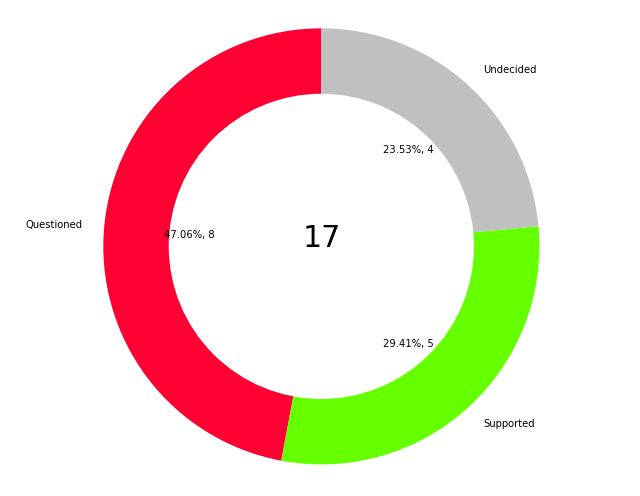

In [6]:
# With matplotlib
labels = np.array(df_stand["stand"]).astype(str)
sizes = np.array(df_stand["count"]).astype(int) 
colors = ['#FF0033','#66FF00','#C0C0C0']




fig1, ax1 = plt.subplots(figsize=(9, 7))
#patches, texts, autotexts = 
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"17", ha='center',fontsize=30)
#plt.title("Island susceptibility hypothesis",fontsize=20)
#autotexts[0].set_fontsize(15)
#texts[0].set_fontsize(15)
#texts[2].set_fontsize(15)

plt.rcParams.update({'font.size': 15})

plt.savefig("img/main_hyp.png")


plt.show()

## To test the hypothesis, some articles investigated plant taxa while others investigated non-plant taxa such as birds, reptiles, etc

## First we look at the plant taxa

## Question 2: How many plant taxa did each article investigate?

In [7]:
df_plants = df[df['Investigated species']=='Plants']
#df_plants

In [8]:
dates = np.array(df_plants['Study date'])
dates

array(['2006', '2009', '2011', '2006', '2010', '2010'], dtype=object)

In [9]:
plants = np.array(df_plants['Number of species'])
plants

array(['1508', '40988', '86', '1', '10', '55'], dtype=object)

In [10]:
studies = np.array(df_plants['index'])
stand_of = np.array(df_plants['stand'])

In [11]:
df9 = pd.DataFrame(data=dict( stud=studies,dates=dates,value=plants,stand=stand_of))

hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Stand of hypothesis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
         '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df9)
p = figure(x_range= studies,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of plant taxa',
     #     title="Number of plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'


show(p)

In [12]:
export_png(p, filename='img/plant.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\island_susceptibility\\img\\plant.png'

## Now we look at the non-plant taxa

## Question 3: How many non-plant taxa did each article investigate?

In [13]:
df_other = df[df['Investigated species']!='Plants']
#df_other

In [14]:
#df_other['Study date'] = pd.to_datetime(df_other['Study date'].astype(str), format='%Y')
dates_other = np.array(df_other['Study date']).astype(str)
dates_other

array(['2016', '2008', '2001', '2003', '2004', '2012', '2008', '2005',
       '2006', '2000', '2011'], dtype='<U4')

In [15]:
df_other = df[df['Investigated species']!='Plants']
#df_other

#df_other['Study date'] = pd.to_datetime(df_other['Study date'].astype(str), format='%Y')
dates_other = np.array(df_other['Study date']).astype(str)
dates_other

array(['2016', '2008', '2001', '2003', '2004', '2012', '2008', '2005',
       '2006', '2000', '2011'], dtype='<U4')

In [16]:
species_other = np.array(df_other['Investigated species'])
stand_of_other = np.array(df_other['stand'])

In [17]:
number_other = np.array(df_other['Number of species'])
studies_other = np.array(df_other['index'])
#palette = ['#FA8072','#006666','#60d4cb','#ee4d2e','#efd566','#00ffbf','#8000ff','#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#efbaca']

In [18]:
df10 = pd.DataFrame(data=dict(stud=studies_other,dates=dates_other,value=number_other,species=species_other,stand=stand_of_other))
df10

,stud,dates,value,species,stand
0,Global patterns in threats to vertebrates by b...,2016,6269,Amphibians; Reptiles; Birds; Mammals,Supported
1,The island biogeography of exotic bird species...,2008,,Birds,Supported
2,Determinants of establishment success in intro...,2001,389,Birds,Questioned
3,A comparative analysis of the relative success...,2003,416,Birds,Supported
4,Global patterns of introduction effort and est...,2004,416,Birds,Questioned
5,Global assessment of establishment success for...,2012,630,Amphibians; Reptiles,Undecided
6,"Across islands and continents, mammals are mor...",2008,,Birds; Mammals,Questioned
7,Establishment success across convergent Medite...,2005,121,Birds,Questioned
8,Why islands are easier to invade: human influe...,2006,1,Amphibians,Supported
9,Are islands more susceptible to be invaded tha...,2000,,Birds,Questioned


In [19]:
hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Investigated taxon', '@species'),
        ('Stand of hypothsis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
        '@{species}' : 'printf',
        '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df10)
p = figure(x_range= studies_other,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of non-plant taxa',
     #     title="Number of non-plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [20]:
export_png(p, filename='img/non_plant.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\island_susceptibility\\img\\non_plant.png'

## Question 4: The literature tests the hypotheses by examining plant and non-plant taxa. What exactly are these non-plant taxa? How many articles investigated each taxon?

In [21]:
Plants = df['Investigated species'].str.count("Plants").sum()
Amphibians = df['Investigated species'].str.count("Amphibians").sum()
Reptiles = df['Investigated species'].str.count("Reptiles").sum()
Birds = df['Investigated species'].str.count("Birds").sum()
Mammals = df['Investigated species'].str.count("Mammals").sum()

data = {'Investigated species':['Plants','Amphibians', 'Reptiles', 'Birds','Mammals'], 
        'count':[Plants,Amphibians, Reptiles, Birds, Mammals]} 
df_species = pd.DataFrame(data)
df_species

,Investigated species,count
0,Plants,6
1,Amphibians,4
2,Reptiles,2
3,Birds,8
4,Mammals,2


In [22]:
spec = np.array(df_species['Investigated species'])
count_spec = np.array(df_species['count'])
palette = ['#e35d6a','#423a28','#c6e2ff','#ecc226','#046070']

In [23]:
df11 = pd.DataFrame(data=dict(species=spec,counts=count_spec,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Investigated taxon', '@species'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@species': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df11)
p = figure(x_range= spec,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Investigated taxon',
           y_axis_label='Number of articles',
 #         title="Number of studies for each investigated species"
          )

p.vbar(x='species',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
#p.title.text_font_size = '15pt'

p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'





show(p)

In [24]:
export_png(p, filename='img/investigated_taxa.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\island_susceptibility\\img\\investigated_taxa.png'

## Question 5: When were the relevant articles published? In other words, what are the most productive years in terms of publishing articles related to this hypothesis?

In [25]:
df_study_date = df.value_counts(['Study date']).reset_index(name='count')
df_study_date

,Study date,count
0,2006,3
1,2011,2
2,2010,2
3,2008,2
4,2016,1
5,2012,1
6,2009,1
7,2005,1
8,2004,1
9,2003,1


In [26]:
study_date = np.array(df_study_date['Study date'])
count_dates = np.array(df_study_date['count'])
palette = ['#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00',
           '#00FFFF','#4682B4','#e35d6a','#423a28','#c6e2ff','#ecc226']

In [27]:
df20 = pd.DataFrame(data=dict(dates=study_date,counts=count_dates,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Article date', '@dates'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@dates': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df20)
p = figure(x_range= study_date,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Puplication year',
           y_axis_label='Number of articles',
    #      title="Number of studies in each year"
          )

p.vbar(x='dates',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/6


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [28]:
export_png(p, filename='img/years.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\island_susceptibility\\img\\years.png'

## Question 6: Where did the studies related to this hypothesis take place?

In [29]:
No_Am = df['Continent'].str.count("North America").sum()
Eur = df['Continent'].str.count("Europe").sum()
Oce = df['Continent'].str.count("Oceania").sum()
Afr = df['Continent'].str.count("Africa").sum()
Asi= df['Continent'].str.count("Asia").sum()
So_Am = df['Continent'].str.count("South America").sum()
All = df['Continent'].str.count("All continents").sum()


data = {'Continent':['North America', 'Europe', 'Oceania', 'Africa','Asia','South America','All continents'], 
        'count':[10, 9, 10, 7, 7, 7,3]} 
dff = pd.DataFrame(data)
dff

,Continent,count
0,North America,10
1,Europe,9
2,Oceania,10
3,Africa,7
4,Asia,7
5,South America,7
6,All continents,3


In [30]:
cont = np.array(dff['Continent'])
count = np.array(dff['count'])
palette = ['#330000','#867979','#ff00bf','#80ff00','#ff8000','#ecc226','#046070']

In [31]:
df10 = pd.DataFrame(data=dict( continents=cont,counts=count,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Continent', '@continents'),
        ('Number of studies', '@counts')
    ],
        formatters={
        '@continents': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df10)
p = figure(x_range= cont,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Continent',
           y_axis_label='Number of articles',
      #    title="Number of studies in each continent"
          )

p.vbar(x='continents',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'
show(p)




In [32]:
export_png(p, filename='img/continents.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\island_susceptibility\\img\\continents.png'